In [1]:
def directory(path,extension):
  list_dir = []
  list_dir = os.listdir(path)
  count = 0
  for file in list_dir:
    if file.endswith(extension): # eg: '.txt'
      count += 1
  return count

In [13]:
file = open("vide_text.txt")
data = file.read()
for count in range(10357):
  file = open(f"data_camp/taxi_log_2008_by_id/{count+1}.txt", "r")
  data2 = file.read()
  data += "\n"
  data += data2
  with open ('todofileee.txt', 'a') as fp:
    fp.write(data2)
    fp.write("\n")


In [5]:
import os

lst = os.listdir("data_camp/taxi_log_2008_by_id") # your directory path
number_files = len(lst)
print(number_files)

10357


In [1]:
import numpy as np
import pandas as pd
#df=pd.read_csv("todofileee.txt", sep=",")
df=pd.read_csv("todofileee.txt", sep=",",low_memory=False).sample(frac =0.0001,random_state=1)

In [2]:
df.head(5)

,1,2008-02-02 15:36:08,116.51172,39.92123
7405452,4401,2008-02-08 01:12:31,116.30523,39.89595
7509468,4467,2008-02-04 21:57:39,116.32569,39.90953
14648328,8600,2008-02-08 06:20:54,116.46103,39.87099
5819289,3541,2008-02-06 21:09:52,116.43321,39.89240
12808428,7457,2008-02-04 00:36:52,116.45562,39.93988


In [3]:
df=df.rename(columns={"1": "taxi-id", "2008-02-02 15:36:08": "date","116.51172":"longitude","39.92123":"latitude"})
df.head(5)

,taxi-id,date,longitude,latitude
7405452,4401,2008-02-08 01:12:31,116.30523,39.89595
7509468,4467,2008-02-04 21:57:39,116.32569,39.90953
14648328,8600,2008-02-08 06:20:54,116.46103,39.87099
5819289,3541,2008-02-06 21:09:52,116.43321,39.89240
12808428,7457,2008-02-04 00:36:52,116.45562,39.93988


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head(5)


,taxi-id,date,longitude,latitude
7405452,4401,2008-02-08 01:12:31,116.30523,39.89595
7509468,4467,2008-02-04 21:57:39,116.32569,39.90953
14648328,8600,2008-02-08 06:20:54,116.46103,39.87099
5819289,3541,2008-02-06 21:09:52,116.43321,39.89240
12808428,7457,2008-02-04 00:36:52,116.45562,39.93988


In [6]:
# Python 3 program to calculate Distance Between Two Points on Earth
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
	
	# The math module contains a function named
	# radians which converts from degrees to radians.
	lon1 = radians(lon1)
	lon2 = radians(lon2)
	lat1 = radians(lat1)
	lat2 = radians(lat2)
	
	# Haversine formula
	dlon = lon2 - lon1
	dlat = lat2 - lat1
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

	c = 2 * asin(sqrt(a))
	
	# Radius of earth in kilometers. Use 3956 for miles
	r = 6371
	
	# calculate the result
	return(c * r)
	
	
def getDistance(A,B):
    return distance(A["latitude"],B["latitude"],A["longitude"],B["longitude"])

def isinBeijing(data):
    beijing = {"lat":40.190632, "lon":116.412144,"radius":sqrt(16411/(np.pi*2))}
    res = []
    for i in range(len(data)):
        if beijing["radius"] >= distance(data.iloc[i]["latitude"],beijing["lat"],data.iloc[i]["longitude"],beijing["lon"]):
            res.append(True)
        else:
            res.append(False)
    return res

In [7]:
def defineZones(data,zoneRadius=15):
    locations = data[["longitude","latitude"]].value_counts()
    centers = []
    for current in locations.index.to_list():
        shoulBeACenter = True
        for c in centers:
            if distance(current[1],c[1],current[0],c[0])<zoneRadius:
                shoulBeACenter = False
                break
        if shoulBeACenter:
            centers.append(current)
    
    return centers
def fillZone(data,centers):
    res = []
    for i in range(len(data)):
        
        l = []
        for c in centers:
            l.append(distance(c[1],data.iloc[i]["latitude"],c[0],data.iloc[i]["longitude"]))
        res.append(np.argmin(l)) 
    return res       

In [8]:
centers = defineZones(df)
df["zone"] = fillZone(df,centers)
print(df.head(5))

          taxi-id                date  longitude  latitude  zone
7405452      4401 2008-02-08 01:12:31  116.30523  39.89595     0
7509468      4467 2008-02-04 21:57:39  116.32569  39.90953     0
14648328     8600 2008-02-08 06:20:54  116.46103  39.87099     0
5819289      3541 2008-02-06 21:09:52  116.43321  39.89240     0
12808428     7457 2008-02-04 00:36:52  116.45562  39.93988     0


In [9]:
df[(df['zone'] == 3) ]

,taxi-id,date,longitude,latitude,zone
1734169,1111,2008-02-03 21:40:48,116.56665,40.07117,3
4784606,2903,2008-02-02 19:52:34,116.48226,39.97892,3
422321,314,2008-02-04 06:02:16,116.49032,40.02626,3
4864505,2947,2008-02-03 13:07:00,116.45943,39.97664,3
15536624,9029,2008-02-04 23:06:23,116.46354,39.98014,3
...,...,...,...,...,...
16763202,9744,2008-02-03 20:56:51,116.56563,40.07159,3
11090252,6569,2008-02-06 19:15:19,116.42805,39.98715,3
1855540,1131,2008-02-08 08:17:45,116.45927,39.96615,3
13204822,7750,2008-02-03 14:58:55,116.47672,40.00016,3


In [10]:
df.head(5)

,taxi-id,date,longitude,latitude,zone
7405452,4401,2008-02-08 01:12:31,116.30523,39.89595,0
7509468,4467,2008-02-04 21:57:39,116.32569,39.90953,0
14648328,8600,2008-02-08 06:20:54,116.46103,39.87099,0
5819289,3541,2008-02-06 21:09:52,116.43321,39.89240,0
12808428,7457,2008-02-04 00:36:52,116.45562,39.93988,0


In [11]:
df.sort_values(by=['taxi-id','date'], inplace=True)
df.head(5)

,taxi-id,date,longitude,latitude,zone
17261,16,2008-02-02 22:07:18,116.71988,40.12125,7
26986,21,2008-02-03 19:16:41,116.49812,39.99355,3
41822,28,2008-02-07 17:11:15,116.43396,39.88710,0
47064,31,2008-02-03 00:25:49,116.41147,39.91377,0
71746,46,2008-02-06 03:02:33,116.53619,40.05433,3


In [12]:
print(df)

          taxi-id                date  longitude  latitude  zone
17261          16 2008-02-02 22:07:18  116.71988  40.12125     7
26986          21 2008-02-03 19:16:41  116.49812  39.99355     3
41822          28 2008-02-07 17:11:15  116.43396  39.88710     0
47064          31 2008-02-03 00:25:49  116.41147  39.91377     0
71746          46 2008-02-06 03:02:33  116.53619  40.05433     3
...           ...                 ...        ...       ...   ...
17574568    10258 2008-02-05 19:32:52  117.22124  40.15029    11
17596615    10285 2008-02-04 21:54:04  116.36801  39.86851     0
17602526    10289 2008-02-06 21:14:45  116.87214  39.69025    21
17621842    10311 2008-02-06 15:30:29  116.54610  39.80381     2
17628147    10315 2008-02-08 09:58:26  116.60268  39.90851     6

[1766 rows x 5 columns]


In [13]:
def other_time(df):
    res=[]
    for i in range(len(df)-1):
        nbr=len(df[(df['taxi-id'] == df.iloc[i]["taxi-id"]) ])
        if df.iloc[i]["taxi-id"]==df.iloc[i+1]["taxi-id"]:
            res.append(df.iloc[i+1]["date"])
        else:
            res.append(df.iloc[i]["date"])
    res.append(df.iloc[len(df)-1]["date"])
    return res

In [14]:
df['next_date']=other_time(df)

In [15]:
df.head(20)

,taxi-id,date,longitude,latitude,zone,next_date
17261,16,2008-02-02 22:07:18,116.71988,40.12125,7,2008-02-02 22:07:18
26986,21,2008-02-03 19:16:41,116.49812,39.99355,3,2008-02-03 19:16:41
41822,28,2008-02-07 17:11:15,116.43396,39.88710,0,2008-02-07 17:11:15
47064,31,2008-02-03 00:25:49,116.41147,39.91377,0,2008-02-03 00:25:49
71746,46,2008-02-06 03:02:33,116.53619,40.05433,3,2008-02-06 03:02:33
97989,66,2008-02-08 12:25:03,116.27956,39.93087,0,2008-02-08 12:25:03
107431,72,2008-02-06 16:29:18,116.41842,39.96767,0,2008-02-06 16:29:18
131756,90,2008-02-02 16:23:15,116.42092,39.90955,0,2008-02-02 16:23:15
139727,96,2008-02-03 00:04:32,116.45595,39.91341,0,2008-02-03 07:22:16
139775,96,2008-02-03 07:22:16,116.48943,40.00228,3,2008-02-03 07:22:16


In [16]:
df['diff_time'] = (df['next_date'] - df['date']).dt.total_seconds()/60

In [17]:
df.head(-20)

,taxi-id,date,longitude,latitude,zone,next_date,diff_time
17261,16,2008-02-02 22:07:18,116.71988,40.12125,7,2008-02-02 22:07:18,0.0
26986,21,2008-02-03 19:16:41,116.49812,39.99355,3,2008-02-03 19:16:41,0.0
41822,28,2008-02-07 17:11:15,116.43396,39.88710,0,2008-02-07 17:11:15,0.0
47064,31,2008-02-03 00:25:49,116.41147,39.91377,0,2008-02-03 00:25:49,0.0
71746,46,2008-02-06 03:02:33,116.53619,40.05433,3,2008-02-06 03:02:33,0.0
...,...,...,...,...,...,...,...
17356885,10085,2008-02-02 13:43:04,116.24763,39.90624,0,2008-02-02 13:43:04,0.0
17363413,10090,2008-02-04 19:27:41,116.27985,39.95847,47,2008-02-04 19:27:41,0.0
17365149,10092,2008-02-04 10:34:44,116.58273,40.06179,3,2008-02-04 10:34:44,0.0
17388982,10113,2008-02-05 13:05:05,116.46684,39.92431,0,2008-02-05 13:05:05,0.0


In [18]:
def arrival_zone(df):
    res=[]
    for i in range(len(df)-1):
        nbr=len(df[(df['taxi-id'] == df.iloc[i]["taxi-id"]) ])
        if df.iloc[i]["taxi-id"]==df.iloc[i+1]["taxi-id"]:
            res.append(df.iloc[i+1]["zone"])
        else:
            res.append(df.iloc[i]["zone"])
    res.append(df.iloc[len(df)-1]["zone"])
    return res

In [19]:
df['arrival_zone']=arrival_zone(df)

In [20]:
df.head(20)

,taxi-id,date,longitude,latitude,zone,next_date,diff_time,arrival_zone
17261,16,2008-02-02 22:07:18,116.71988,40.12125,7,2008-02-02 22:07:18,0.000000,7
26986,21,2008-02-03 19:16:41,116.49812,39.99355,3,2008-02-03 19:16:41,0.000000,3
41822,28,2008-02-07 17:11:15,116.43396,39.88710,0,2008-02-07 17:11:15,0.000000,0
47064,31,2008-02-03 00:25:49,116.41147,39.91377,0,2008-02-03 00:25:49,0.000000,0
71746,46,2008-02-06 03:02:33,116.53619,40.05433,3,2008-02-06 03:02:33,0.000000,3
97989,66,2008-02-08 12:25:03,116.27956,39.93087,0,2008-02-08 12:25:03,0.000000,0
107431,72,2008-02-06 16:29:18,116.41842,39.96767,0,2008-02-06 16:29:18,0.000000,0
131756,90,2008-02-02 16:23:15,116.42092,39.90955,0,2008-02-02 16:23:15,0.000000,0
139727,96,2008-02-03 00:04:32,116.45595,39.91341,0,2008-02-03 07:22:16,437.733333,3
139775,96,2008-02-03 07:22:16,116.48943,40.00228,3,2008-02-03 07:22:16,0.000000,3


In [21]:
df[(df['longitude'] ==116.71988) & (df['latitude'] <=40.12125)]['zone'].iloc[0]

7

In [22]:
def next_longitude(df):
    res=[]
    for i in range(len(df)-1):
        nbr=len(df[(df['taxi-id'] == df.iloc[i]["taxi-id"]) ])
        if df.iloc[i]["taxi-id"]==df.iloc[i+1]["taxi-id"]:
            res.append(df.iloc[i+1]["longitude"])
        else:
            res.append(df.iloc[i]["longitude"])
    res.append(df.iloc[len(df)-1]["longitude"])
    return res
def next_latitude(df):
    res=[]
    for i in range(len(df)-1):
        nbr=len(df[(df['taxi-id'] == df.iloc[i]["taxi-id"]) ])
        if df.iloc[i]["taxi-id"]==df.iloc[i+1]["taxi-id"]:
            res.append(df.iloc[i+1]["latitude"])
        else:
            res.append(df.iloc[i]["latitude"])
    res.append(df.iloc[len(df)-1]["latitude"])
    return res

def find_way(dep_lat,dep_long,arr_lat,arr_long):
    long_dist=[]
    lat_dist=[]
    zone_list=[]
    diff_lat=(arr_lat-dep_lat)/100
    diff_long=(arr_long-dep_long)/100
    while s<1:
        df=df[(df['latitude'] >=dep_lat+s*diff_lat) & (df['latitude'] <=dep_lat+s*diff_lat) ]
        df=df[(df['longitude'] >= dep_lat+s*diff_long) & (df['longitude'] <= dep_lat+s*diff_long) ]
        df.sort_values(by=['latitude','longitude'], inplace=True)
        while o<1:
            f=f+1
            if zone_list.find(df.iloc[f]["zone"])==-1:
                zone_list.append(df.iloc[f]["zone"])
                #groub_by for les zone
                o=2
            else:
                pass
    return zone_list
    
    

In [287]:
 def enrichment_data(df):
        def get_dom(dt):
            return dt.day
        def get_month(dt): 
            return dt.month
        def get_year(dt):
            return dt.year
        def get_hour(dt):
            return dt.hour
        def get_min(dt):
            return dt.minute
        def get_week(dt):
            return dt.week
        df['dom'] = df['date'].map(get_dom)
        df['month']= df['date'].map(get_month)
        df['year']= df['date'].map(get_year)
        df['hour']= df['date'].map(get_hour)
        df['min']= df['date'].map(get_min)
        df['next_hour']= df['next_date'].map(get_hour)
        df['next_min']= df['next_date'].map(get_min)
        df['week']= df['next_date'].map(get_week)

In [288]:
enrichment_data(df)

In [289]:
df.head()

,taxi-id,date,longitude,latitude,zone,next_date,diff_time,arrival_zone,dom,month,year,hour,min,next_hour,next_min,week
17261,16,2008-02-02 22:07:18,116.71988,40.12125,7,2008-02-02 22:07:18,0.0,7,2,2,2008,22,7,22,7,5
26986,21,2008-02-03 19:16:41,116.49812,39.99355,3,2008-02-03 19:16:41,0.0,3,3,2,2008,19,16,19,16,5
41822,28,2008-02-07 17:11:15,116.43396,39.88710,0,2008-02-07 17:11:15,0.0,0,7,2,2008,17,11,17,11,6
47064,31,2008-02-03 00:25:49,116.41147,39.91377,0,2008-02-03 00:25:49,0.0,0,3,2,2008,0,25,0,25,5
71746,46,2008-02-06 03:02:33,116.53619,40.05433,3,2008-02-06 03:02:33,0.0,3,6,2,2008,3,2,3,2,6


In [290]:
enc=df[(df['diff_time'] > 0) ]

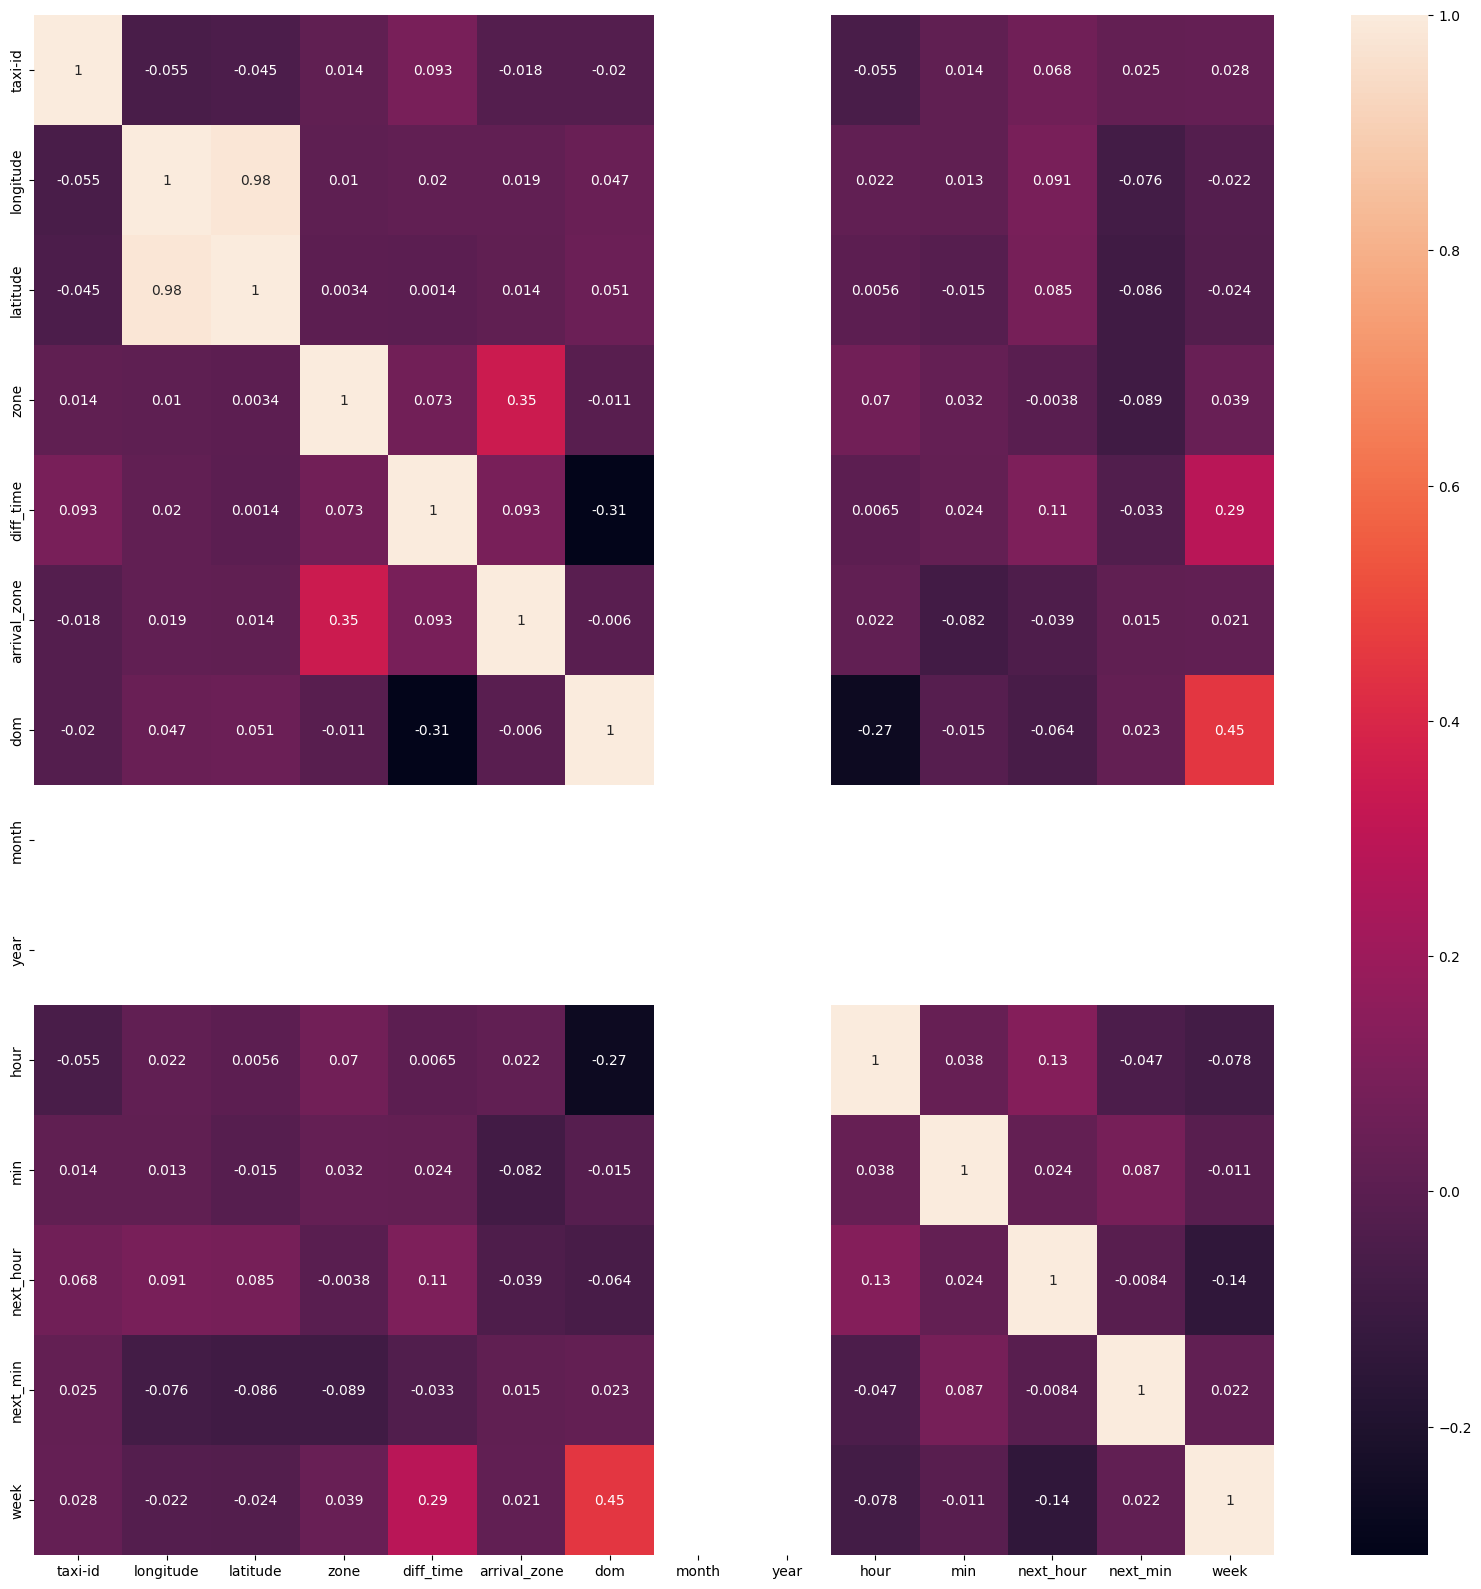

In [291]:
#6
import matplotlib.pyplot as plt 
import seaborn as sns
correlation_matrix = enc.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(data=correlation_matrix, annot=True)

plt.show()
#The most correlated with the target variable are RM,LSTAT

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(enc.drop(columns=['taxi-id','date','next_date','year','next_hour','next_min','month','latitude','longitude']),enc['diff_time'] , test_size = 0.2, random_state=1)

In [356]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from  sklearn.svm import SVC
from sklearn import neighbors 
# create a regressor object
regressor = KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree',p=10,weights='distance',n_jobs=5)
regressor2 = MLPClassifier()

# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)

y_test_predict = regressor.predict(X_test)

In [357]:
y_test_predict

array([5219.2715244 ,  925.24325227, 1096.61818424,  695.20890014,
       4469.04007177, 2775.55457439,  801.403326  , 2247.81094383,
       3504.93785166, 2411.56279136,   49.50675676,  355.32341073,
        730.88176167, 1268.2583506 , 1457.79980168, 2142.25738514,
       1565.0629822 , 3346.05203162,  464.30201991, 3208.8727906 ,
       2539.6787083 ,  887.30727403,  242.11512171,  262.44378653,
       6476.11276815,  762.70237943,  697.77239074, 1805.8119604 ,
        373.96128097, 4432.86511377,   75.6875415 , 1910.81198944,
       4903.30271737,  111.39267774, 5323.12883364,  998.25511598,
       4705.57147063,  167.34944929, 1188.27116134, 1399.07783635,
       1483.48054386,   44.71131554,   66.72456364,  678.05543313,
         30.84366848,   26.63300275,  841.54631076,  458.72387629,
        336.18867123, 4730.74239181,  870.47700838, 1334.78749019,
        273.73632409,  782.93476884, 1187.07291733, 3616.69691947,
         53.65193129, 2694.98901245,  585.48867031, 1544.26001

In [358]:
Y_test

13778016    5202.683333
11260311     940.833333
16534662    1124.616667
8523453      706.866667
15648591    4451.633333
               ...     
13601541    4927.633333
6933437     1475.383333
15268929     173.350000
4392234      965.383333
555746       898.283333
Name: diff_time, Length: 72, dtype: float64

In [366]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
rmse =math.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

In [367]:
print(rmse)
print(r2)

21.513305530810673
0.9998246454430979


In [ ]:
def find_theway(dep_lat,dep_long,arr_lat,arr_long):
    long_dist=[]
    lat_dist=[]
    zone_list=[]
    diff_lat=(arr_lat-dep_lat)/100
    diff_long=(arr_long-dep_long)/100
    while s<1:
        df=df[(df['latitude'] >=dep_lat+s*diff_lat) & (df['latitude'] <=dep_lat+s*diff_lat) ]
        df=df[(df['longitude'] >= dep_long) & (df['longitude'] <= arr_long) ]
        df.sort_values(by=['latitude','longitude'], inplace=True)
        while o<1:
            f=f+1
            if zone_list.find(df.iloc[f]["zone"])==-1:
                zone_list.append(df.iloc[f]["zone"])
                #groub_by for les zone
                o=2
            else:
                pass
    return zone_list